In [92]:
#Initalize import for Random Forest Modelling
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Load datasets
X_train = pd.read_csv("../04_modelling/dataset/X_train.csv")
y_train = pd.read_csv("../04_modelling/dataset/y_train.csv")
X_val = pd.read_csv("../04_modelling/dataset/X_val.csv")
y_val = pd.read_csv("../04_modelling/dataset/y_val.csv")
X_test = pd.read_csv("../04_modelling/dataset/X_test.csv")
y_test = pd.read_csv("../04_modelling/dataset/y_test.csv")

In [94]:
# Ensure y datasets are flattened 
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

In [95]:
# Random Forest Model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [96]:
# Predictions
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

In [97]:
# Metrics Calculation
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    return mse, mae, r2

print("Model Evaluation Metrics:")
evaluate_model(y_val, y_val_pred, "Validation")
evaluate_model(y_test, y_test_pred, "Test")

Model Evaluation Metrics:
Validation - MSE: 8.3012, MAE: 2.0297, R²: 0.8555
Test - MSE: 7.4835, MAE: 1.9932, R²: 0.8696


(7.483517948717949, 1.9931623931623932, 0.8695537711620583)

### Validation Metrics

##### MSE: 8.3012
- **Interpretation**:  
  The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A relatively low MSE on the validation set implies that the model is making small prediction errors on average, though it is sensitive to outliers.
  
  - **What this means**:  
    The model's average squared error is 8.3012, indicating that, on average, the model's predictions deviate by approximately 2.88 units (the square root of MSE). This shows that the model is generally accurate, but outliers may be influencing the metric.
  
##### MAE: 2.0297
- *#*Interpretation**:  
  The Mean Absolute Error (MAE) represents the average absolute error in the model's predictions. It gives a clear picture of the average magnitude of errors, without considering their direction.
  
  - **What this means**:  
    With an MAE of 2.03, the model's predictions are, on average, 2.03 units off from the true values. This suggests that the model is fairly accurate, but there are some areas where predictions may be off slightly.
  
##### 𝑅²: 0.8555
- **Interpretation**:  
  R-squared (𝑅²) indicates the proportion of variance in the target variable that is explained by the model. A value of 0.8555 means that 85.55% of the variance in the validation data is explained by the model.
  
  - **What this means**:  
    This is a **good R² value**, suggesting that the model fits the validation data well. An 𝑅² value above 0.85 typically indicates a good fit, meaning the model can explain a large portion of the variability in the target variable.

---

#### Test Metrics

##### MSE: 7.4835
- **Interpretation**:  
  The MSE on the test set is slightly lower than the validation set, which suggests that the model generalizes well to unseen data.

  - **What this means**:  
    A lower MSE on the test set (7.4835) compared to the validation set suggests that the model has performed well on unseen data and is not overfitting to the training data.

##### MAE: 1.9932
- **Interpretation**:  
  The MAE for the test set is 1.9932, which is slightly better than the validation MAE, indicating consistent model performance.

  - **What this means**:  
    The model's average error on the test set is slightly lower, suggesting it has generalized better and is not making larger errors on the test data.

##### 𝑅²: 0.8696
- **Interpretation**:  
  The 𝑅² value of 0.8696 on the test set suggests that the model explains 86.96% of the variance in the test data.

  - **What this means**:  
    This R² value is slightly better than the validation set (0.8555), indicating that the model is stable and has good predictive power, even on unseen data.

---

#### Key Insights

- **Performance Consistency**:  
  The close values between validation and test metrics show that the model is not overfitting and generalizes well to unseen data.
  
- **Error Interpretation**:  
  The MSE is slightly higher than the MAE due to its sensitivity to large errors. This indicates that while the model is generally accurate, there might be a few outliers contributing to larger squared errors.

- **Goodness of Fit**:  
  The R² values above 0.85 for both the validation and test sets suggest that the model is explaining a large portion of the variance in the data, indicating a good fit.



In [98]:
# Feature Importance
feature_importances = rf.feature_importances_
features = X_train.columns

In [99]:
# Sort the features and their importance values
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
sorted_features = np.array(features)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21508\489670688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, orient='h', palette='viridis')


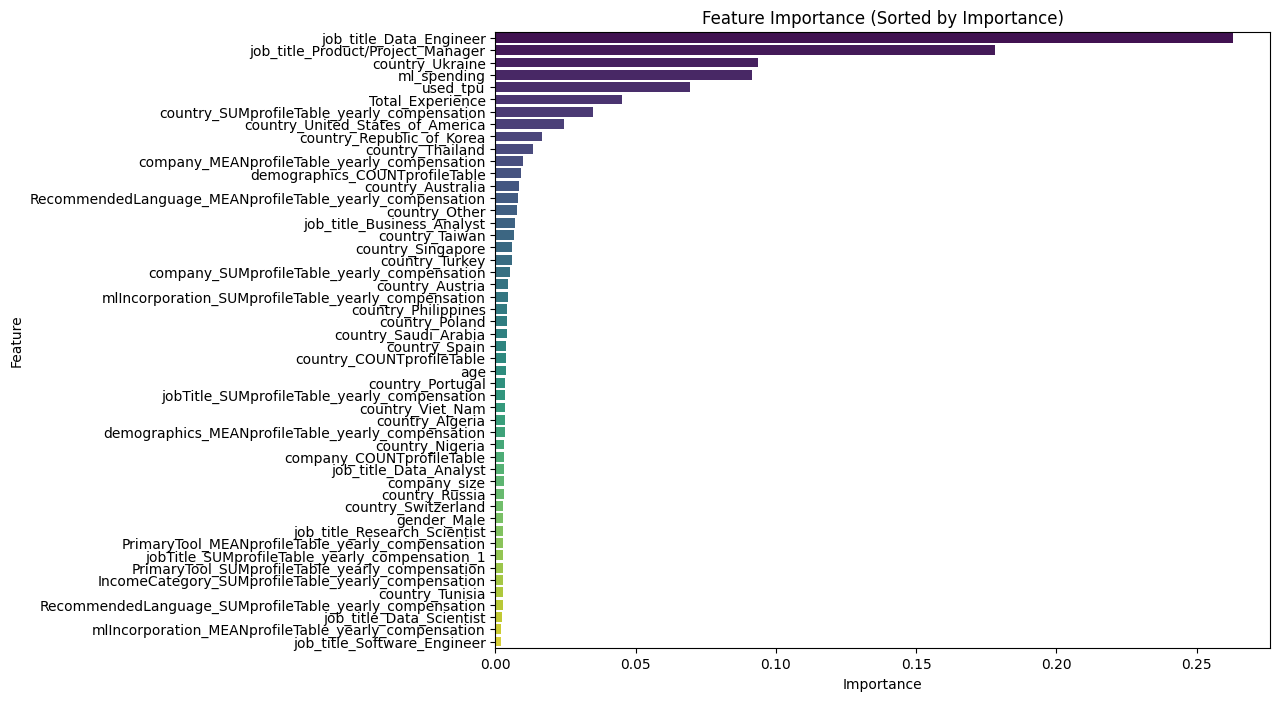

In [100]:
# Plot Feature Importance (sorted)
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_features, orient='h', palette='viridis')
plt.title("Feature Importance (Sorted by Importance)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

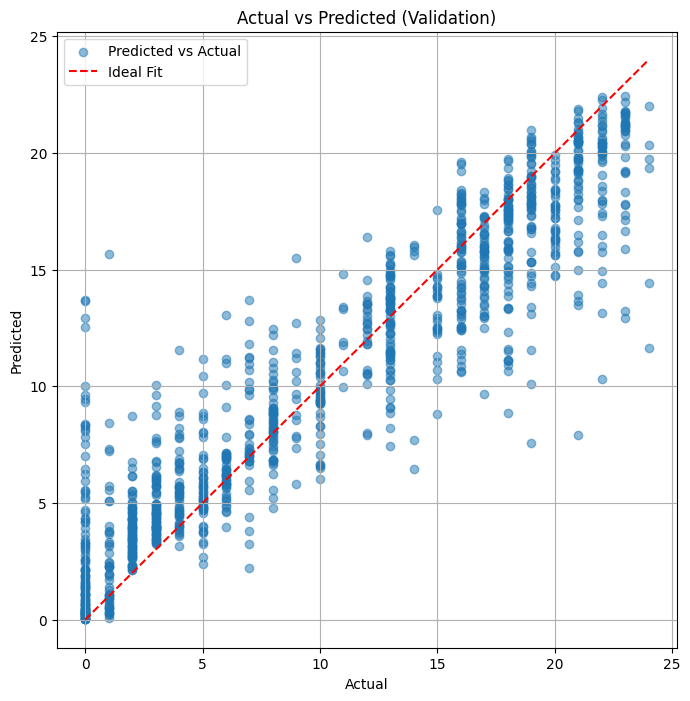

In [101]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--r', label='Ideal Fit')
plt.title("Actual vs Predicted (Validation)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [102]:
#Initialize imports for Hyperparameter Tuning (RandomizeSearchCV)
from sklearn.model_selection import RandomizedSearchCV

In [103]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Valid options for max_features
}

In [104]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [105]:
# RandomizedSearchCV for tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of different combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [106]:
# Perform the search
print("Starting RandomizedSearchCV...")
random_search.fit(X_train, y_train)

Starting RandomizedSearchCV...


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [107]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters found by RandomizedSearchCV:", best_params)

Best Parameters found by RandomizedSearchCV: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}


In [108]:
# Train the best model
best_rf_model = random_search.best_estimator_

In [109]:
# Predictions with the best model
y_val_pred_tuned = best_rf_model.predict(X_val)
y_test_pred_tuned = best_rf_model.predict(X_test)

In [110]:
# Evaluate the tuned model
print("\nTuned Model Evaluation Metrics:")
evaluate_model(y_val, y_val_pred_tuned, "Validation (Tuned)")
evaluate_model(y_test, y_test_pred_tuned, "Test (Tuned)")


Tuned Model Evaluation Metrics:
Validation (Tuned) - MSE: 8.2416, MAE: 2.0271, R²: 0.8565
Test (Tuned) - MSE: 7.3729, MAE: 1.9736, R²: 0.8715


(7.372915832934587, 1.9736310400093733, 0.8714816918277539)

In [111]:
# Feature Importance of the tuned model
feature_importances_tuned = best_rf_model.feature_importances_

In [112]:
# Sort the features and their importance values
sorted_indices_tuned = np.argsort(feature_importances_tuned)[::-1]  # Sort in descending order
sorted_features_tuned = np.array(features)[sorted_indices_tuned]
sorted_importances_tuned = feature_importances_tuned[sorted_indices_tuned]

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_21508\2354441302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances_tuned, y=sorted_features_tuned, orient='h', palette='viridis')


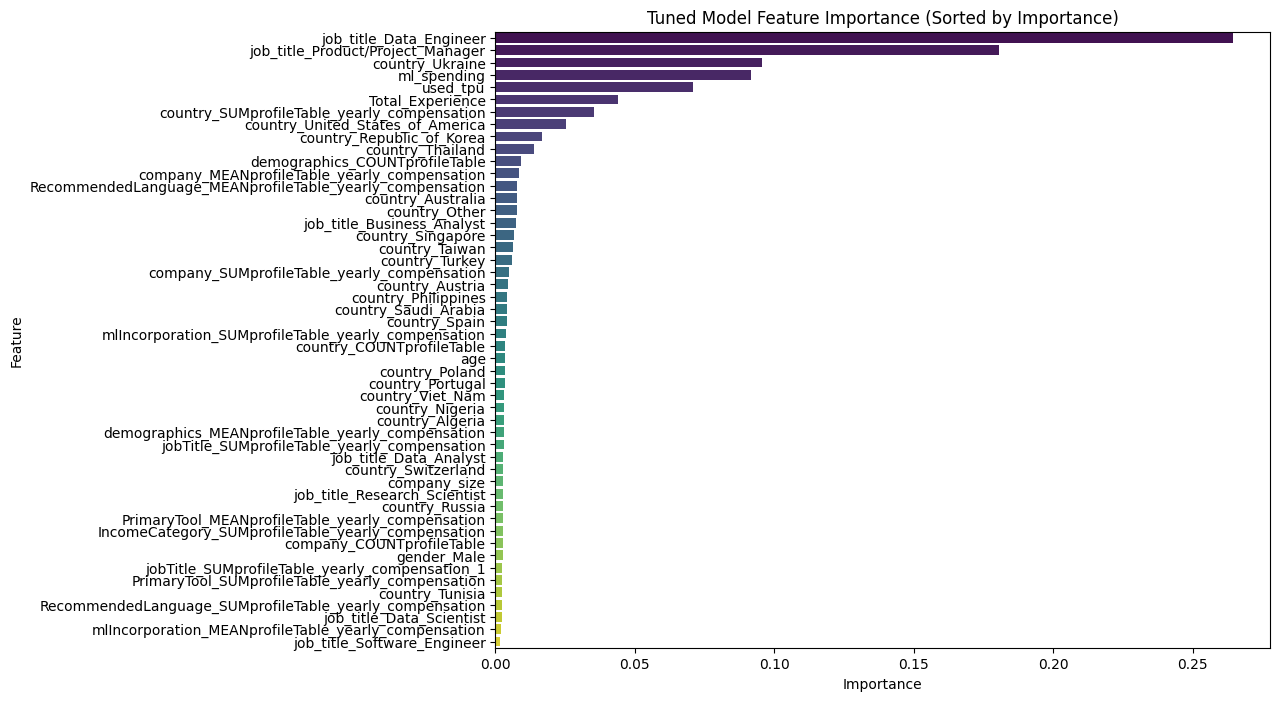

In [113]:
# Plot Feature Importance for the tuned model (sorted)
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances_tuned, y=sorted_features_tuned, orient='h', palette='viridis')
plt.title("Tuned Model Feature Importance (Sorted by Importance)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

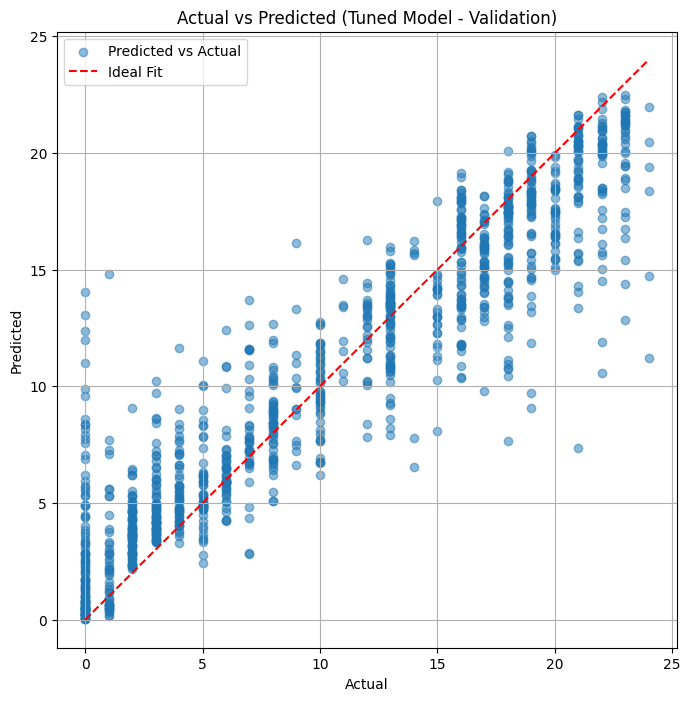

In [114]:
# Actual vs Predicted Plot for Tuned Model (Validation)
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_val_pred_tuned, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--r', label='Ideal Fit')
plt.title("Actual vs Predicted (Tuned Model - Validation)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)
plt.show()

### Saving Model


In [129]:
# # Initalize imports
# import joblib
# import os

In [130]:
# # Define the absolute path for the model save directory
# save_directory = r'C:\Users\NITRO 5\Documents\Assignments\WIE3007---Data-Mining-and-Warehousing\data-mining-warehousing-wages-analysis\notebooks\04_modelling\models'


In [131]:
# # Save the tuned Random Forest model to the specified directory
# joblib.dump(best_rf_model, os.path.join(save_directory, 'random_forest_model.pkl'))

['C:\\Users\\NITRO 5\\Documents\\Assignments\\WIE3007---Data-Mining-and-Warehousing\\data-mining-warehousing-wages-analysis\\notebooks\\04_modelling\\models\\random_forest_tuned_model.pkl']